![Bellabeat logo](https://upload.wikimedia.org/wikipedia/commons/2/24/Bellabeatlogo.png)
# **Introduction**
## **About the Company**
In this case study, we are looking at a company called Bellabeat. Bellabeat is a wellness technology company founded in 2013 and focuses on creating smart devices for women. These smart devices collect data ranging from activity, sleep, stress, and reproductive health.  Although they are succesful for their size,and growing rapidly, they believe that they can grow even more to become a substantial player in the global smart device market. Cofounder and CEO, Urška Sršen, believes that data analysis is key in detecting and observing new growth oppurtunities for the company. The company often invests in several marketing media; however, with an analysis of consumer data, Bellabeat aims to discover ways to improve their marketing strategy resulting in better sales, health, and overall satisfaction with their consumers. 

## **Purpose of The Analysis**
With this, the case study revolves around the analysis of smart device data on one of Bellabeat's products in order to gain insight into how their consumers use the smart devices. These insights can lead to findings that could potentially be driving points in new product marketing or even towards the refinement of certain features. The analysis will help in creating a summary of the business task: **Identifying potential growth oppurtunities and suggest recommendations for improving the marketing strategy based on consumer product usage.** With this in mind, we can ask ourselves important questions to guide our analysis in answering the business task.

## **Guiding Questions**
* What are some trends in device usage, For example, do consumers tend to wear their smart device all day or do they track activity more than they do their sleep?
* How can these trends apply to Bellabeat consumer base?
* How can these trends influence Bellabeats marketing strategy? For example, can we focus on a certain feature that is more predominantly used in order to drive marketing, or can we improve other features and alter our marketing strategy based on how the device is used?

These questions are important to ask in order to begin thinking of how we can use consumer data to help answer our business task. With this in mind, we can begin preparing our data for exploration and visualization.



# **Preparing the Data**
## **About our Dataset**
The CEO of Bellabeat has pointed towards the use of a public dataset which explores smart device users' daily habits. This dataset is available under CC0 public domain and free to use. For this case study we are using this data set: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) 

This dataset provides us FitBit Fitness Tracker data, a smart device similar to that of the Bellabeat products. This specific dataset contains data of 33 users over the span of 3 months. Using this data, we can discover trends which can possibly be used to provide informed decisions to Bellabeat's marketing strategy. 
For this case study, we will be using RStudio to analyze and visualize our dataset. Before importing and preparing our data, we must first load our packages. 
## **Setting up Our Environment**
### **Loading Packages**
Before working on our data, we first set up our work environment by installing and loading any packages we will use throughout our analysis. The following packages are loaded to improve the efficiency of our analysis.

In [27]:
library(tidyverse)    # For data transformation
library(lubridate)    # For handling date-time data
library(dplyr)        # For data manipulation
library(ggplot2)      # For data mapping/visualization
library(tidyr)        # For data organization
library(skimr)        # For data summaries
library(janitor)      # For data cleaning

### **Importing Datasets**
Once the packages are all installed and loaded, we can begin importing our data set. We can do this by downloading the zipped archive from the link above and reading in our .csv files in RStudio using read.csv(). For this analysis, I will read in daily data regarding: daily activity, daily calories burned, intensity of workout per day, daily steps, sleep per day in minutes, and a weight log of users. With this data we hope to uncover certain trends to help in providing informed suggestions to improve our marketing strategy.
 

In [28]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


## **Exploring the Data**

With the data properly loaded in, we can start looking at the individual data frame structure for inconsistencies or missing values. For this we can use the glimpse() function from the dplyr package. Glimpse() provides a more compact and easier to read overview of our column names and data types. We can also use the summary() function to provide us with summary statistics for our data. 

In [29]:
# Check column names and data types
glimpse(daily_activity)


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [30]:
# Check column names and data types
glimpse(daily_calories)

Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ Calories    <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775…


In [31]:
# Check column names and data types
glimpse(daily_intensity)

Rows: 940
Columns: 10
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDay              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ SedentaryMinutes         <int> 728, 776, 1218, 726, 773, 539, 1149, 775, 818…
$ LightlyActiveMinutes     <int> 328, 217, 181, 209, 221, 164, 233, 264, 205, …
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…


In [32]:
# Check column names and data types
glimpse(daily_steps)

Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ StepTotal   <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, 1054…


In [33]:
# Check column names and data types
glimpse(daily_sleep)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [34]:
# Check column names and data types
glimpse(weight_log)

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


In [35]:
# Summary statistics to detect anomalies
summary(daily_activity)

       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

In [36]:
# Summary statistics to detect anomalies
summary(daily_calories)

       Id            ActivityDay           Calories   
 Min.   :1.504e+09   Length:940         Min.   :   0  
 1st Qu.:2.320e+09   Class :character   1st Qu.:1828  
 Median :4.445e+09   Mode  :character   Median :2134  
 Mean   :4.855e+09                      Mean   :2304  
 3rd Qu.:6.962e+09                      3rd Qu.:2793  
 Max.   :8.878e+09                      Max.   :4900  

In [37]:
# Summary statistics to detect anomalies
summary(daily_intensity)

       Id            ActivityDay        SedentaryMinutes LightlyActiveMinutes
 Min.   :1.504e+09   Length:940         Min.   :   0.0   Min.   :  0.0       
 1st Qu.:2.320e+09   Class :character   1st Qu.: 729.8   1st Qu.:127.0       
 Median :4.445e+09   Mode  :character   Median :1057.5   Median :199.0       
 Mean   :4.855e+09                      Mean   : 991.2   Mean   :192.8       
 3rd Qu.:6.962e+09                      3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :8.878e+09                      Max.   :1440.0   Max.   :518.0       
 FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
 Min.   :  0.00      Min.   :  0.00    Min.   :0.000000       
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:0.000000       
 Median :  6.00      Median :  4.00    Median :0.000000       
 Mean   : 13.56      Mean   : 21.16    Mean   :0.001606       
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:0.000000       
 Max.   :143.00      Max.   :210.00    Max.   :0.110000       
 LightActiveD

In [38]:
# Summary statistics to detect anomalies
summary(daily_steps)

       Id            ActivityDay          StepTotal    
 Min.   :1.504e+09   Length:940         Min.   :    0  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790  
 Median :4.445e+09   Mode  :character   Median : 7406  
 Mean   :4.855e+09                      Mean   : 7638  
 3rd Qu.:6.962e+09                      3rd Qu.:10727  
 Max.   :8.878e+09                      Max.   :36019  

In [39]:
# Summary statistics to detect anomalies
summary(daily_sleep)

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

In [40]:
# Summary statistics to detect anomalies
summary(weight_log)

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport         LogId          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                      3rd 

Using both the glimpse() and summary() functions, we get a better understanding of the data we are working with. The glimpse() functions shows how many columns and rows in each data frame as well as the data types of each column with a couple of examples. The summary() function shows us some summary statistics of each column of our data frames as well as any missing values. Some interesting findings include:
* from the daily_sleep data frame, our average sleep in minutes for our users is 419 minutes (6.983 hours)
* our average steps per day, from the daily_steps data frame, is 7638 steps (the [CDC](https://www.cdc.gov/physical-activity-basics/benefits/index.html#:~:text=Taking%20more%20steps%20a%20day,to%208%2C000%20steps%20per%20day.) recommends 8000-10000 steps a day to prevent premature death in adults below 60)
* our users average BMI (body mass index) is 25.2, slightly higher than the healthy adult range of 18.5-24.9.


In [41]:
n_distinct(daily_activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_intensity$Id)
n_distinct(daily_steps$Id)
n_distinct(daily_sleep$Id)
n_distinct(weight_log$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

Furthermore, we used the n_distinct() function to find the number of unique ID's in our data set. This gives us a better understanding of how many unique people we have in our data. With this in mind, we have:
* 33 users tracking activity, calories, intensity, and steps
* 24 users tracking sleep
* 8 users tracking their weight

With all of this in mind, we have a good idea of what this data means and how we can better use it. We can then begin cleaning it for analysis and visualization.

## **Cleaning the Data**
Before crafting data visualizations to draw conclusions from, we first clean our data frames to ensure we can better analyze trends. For example, fixing any formatting issues (like date formats) or removing duplicates can make the accuracy of our analysis much better. Earlier we also observed a strong outlier in the weight_log data frame using the summary() function. We saw that there was a column (fat) with 65 missing values, the only column in our dataset with such an anomaly. We will also drop any unnecessary columns from our data in this process. 

In [42]:
# Converting chr data types to date data types

daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)
daily_calories$ActivityDay <- mdy(daily_calories$ActivityDay)
daily_intensity$ActivityDay <- mdy(daily_intensity$ActivityDay)
daily_steps$ActivityDay <- mdy(daily_steps$ActivityDay)
daily_sleep$SleepDay <- mdy_hms(daily_sleep$SleepDay)
weight_log$Date <- mdy_hms(weight_log$Date)

str(daily_activity$ActivityDate)
str(daily_calories$ActivityDay)
str(daily_intensity$ActivityDay)
str(daily_steps$ActivityDay)
str(daily_sleep$SleepDay)
str(weight_log$Date)

 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...
 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...
 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...
 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...
 POSIXct[1:413], format: "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" "2016-04-17" ...
 POSIXct[1:67], format: "2016-05-02 23:59:59" "2016-05-03 23:59:59" "2016-04-13 01:08:52" ...


In [43]:
# Locating duplicate data

sum(duplicated(daily_activity))
sum(duplicated(daily_calories))
sum(duplicated(daily_intensity))
sum(duplicated(daily_steps))
sum(duplicated(daily_sleep))
sum(duplicated(weight_log))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

In [44]:
# Removing duplicate data

daily_sleep <- daily_sleep %>%
    distinct() %>%
    drop_na()

sum(duplicated(daily_sleep))

[1] 0

In [45]:
# Deleting outliers/anomalous data

weight_log <- select(weight_log, -Fat)
str(weight_log)


'data.frame':	67 obs. of  7 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : POSIXct, format: "2016-05-02 23:59:59" "2016-05-03 23:59:59" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


The weight_log data frame no longer has the Fat column. Although deleting outlying data could sometimes be bad for analysis, this case only had 2 values out of 67 total (65 NA values); Hence, the entire column could be dropped since it would be negligible for our analysis. 

## **Transforming the Data**

With the data now cleaned up, we can transform some values for easier analysis and overall readability. For example, in our daily_sleep data frame, the sleep time is counted in minutes. Although one can simply calculate that into hours, we can simplify this by transforming the data so it is changed into hours and is reflected as such in further visuals. 

In [46]:
# Transforming minutes to hours in daily_sleep

daily_sleep_hours <- daily_sleep %>%
    mutate(
        TotalHoursAsleep = round(daily_sleep$TotalMinutesAsleep/60,1),
        TotalHoursInBed = round(daily_sleep$TotalTimeInBed/60,1)
    )
head(daily_sleep_hours)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed
,<dbl>,<dttm>,<int>,<int>,<int>,<dbl>,<dbl>
1,1503960366,2016-04-12,1,327,346,5.4,5.8
2,1503960366,2016-04-13,2,384,407,6.4,6.8
3,1503960366,2016-04-15,1,412,442,6.9,7.4
4,1503960366,2016-04-16,2,340,367,5.7,6.1
5,1503960366,2016-04-17,1,700,712,11.7,11.9
6,1503960366,2016-04-19,1,304,320,5.1,5.3


In [47]:
# Merging data for analysis
merged_data <- merge(daily_activity, daily_sleep_hours, by.x=c("Id","ActivityDate"),by.y=c("Id","SleepDay"),all=TRUE)

# Cleaning the merged data from missing values
merged_data_clean <- na.omit(merged_data)

head(merged_data_clean)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHoursInBed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,5.4,5.8
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,6.4,6.8
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,6.9,7.4
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,5.7,6.1
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,11.7,11.9
8,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,5.1,5.3


# **Analyzing the Data**
In the previous section we:
* Checked for missing values and inconsistencies in the dataset.
* Converted date columns to appropriate date format using `lubridate`.
* Merged relevant datasets (Activity & Sleep) for deeper analysis.

With all of our data cleaned and transformed, we can create visualizations to map out trends and identify any important patterns that could be helpful for Bellabeats improved marketing strategy.

## **Activity and Calories Analysis**
### **Total Steps vs. Calories Burned**
* Scatter plot showing the relationship between steps and calories burned
* Shows a strong positive correlation.
* Confirms that increased physical activity leads to higher calorie expenditure.

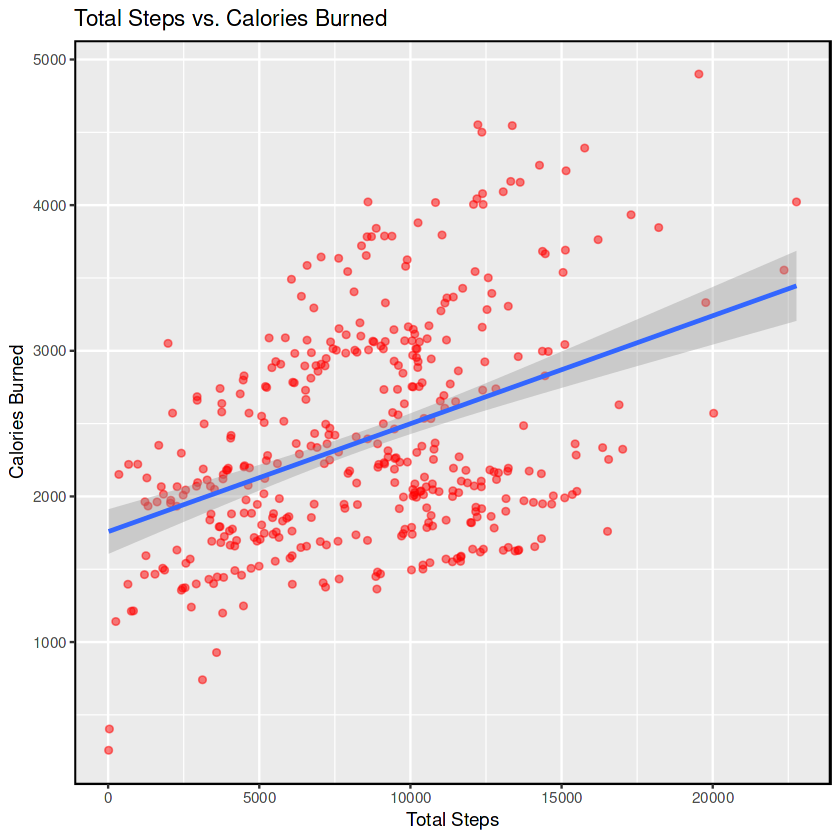

In [48]:
# Scatter plot to validate activity to calories burned
ggplot(merged_data_clean, aes(x = TotalSteps, y = Calories)) +
  geom_point(alpha = 0.5, color = "red") +
  geom_smooth(method = "lm", formula = 'y ~ x') +
  labs(title = "Total Steps vs. Calories Burned", x = "Total Steps", y = "Calories Burned") +
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.75))


### **Time Spent in Different Activity Levels and Intensity of those Levels Across the Week**
* Boxplot and bar chart visualization of sedentary, lightly active, moderately active, and very active minutes.
* Boxplot shows time spent (in minutes) in different activity levels by our users.
* Stacked bar chart shows how the time spent in different activity levels changes during the week.
* Users spend the most time in sedentary activity levels.

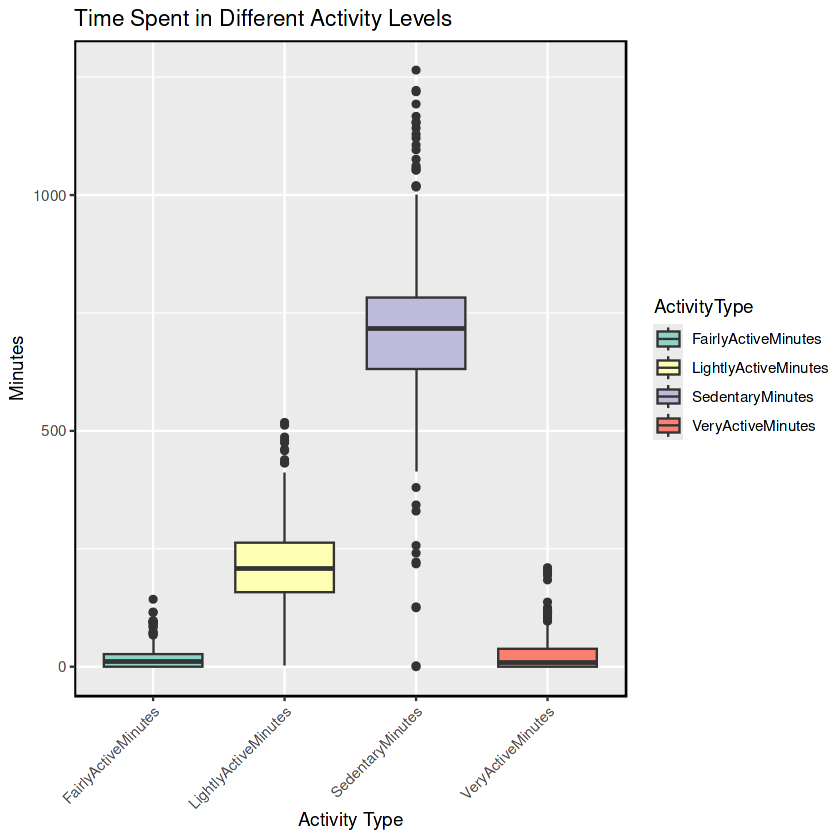

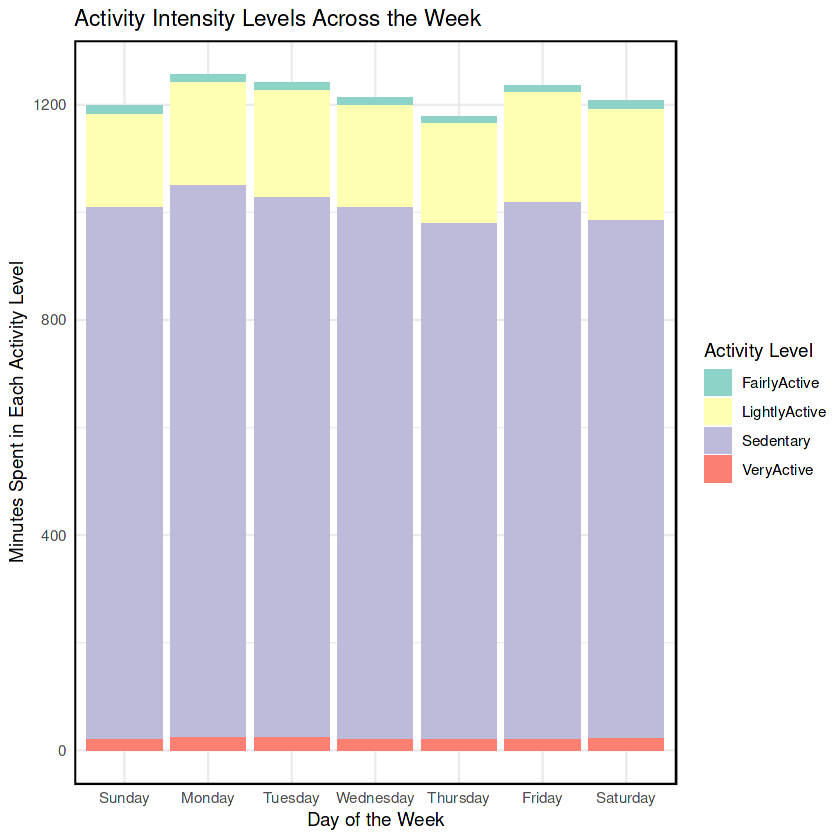

In [49]:
### Box Plot ###

# Box plot showing the time spent in different activity levels
merged_data_clean %>%
  select(SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes) %>%
  pivot_longer(cols = everything(), names_to = "ActivityType", values_to = "Minutes") %>%
  ggplot(aes(x = ActivityType, y = Minutes, fill = ActivityType)) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1), panel.border = element_rect(color = "black", fill = NA, linewidth = 0.75)) +
  geom_boxplot() +
  labs(title = "Time Spent in Different Activity Levels", x = "Activity Type", y = "Minutes") +
  scale_fill_brewer(palette = "Set3")

### Stacked Bar Chart ###

# Convert date to day of the week
daily_intensity$DayOfWeek <- weekdays(as.Date(daily_intensity$ActivityDay, format="%m/%d/%Y"))

# Summarize total time spent at each intensity level per day
activity_summary <- daily_intensity %>%
  group_by(DayOfWeek) %>%
  summarise(Sedentary = mean(SedentaryMinutes),
            LightlyActive = mean(LightlyActiveMinutes),
            FairlyActive = mean(FairlyActiveMinutes),
            VeryActive = mean(VeryActiveMinutes)) %>%
  tidyr::pivot_longer(cols = -DayOfWeek, names_to = "Intensity", values_to = "Minutes")

# Reorder days for correct weekday order
activity_summary$DayOfWeek <- factor(activity_summary$DayOfWeek, 
                                     levels = c("Sunday", "Monday", "Tuesday", "Wednesday", 
                                                "Thursday", "Friday", "Saturday"))

# Stacked bar chart
ggplot(activity_summary, aes(x = DayOfWeek, y = Minutes, fill = Intensity)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set3") +
  labs(title = "Activity Intensity Levels Across the Week",
       x = "Day of the Week",
       y = "Minutes Spent in Each Activity Level",
       fill = "Activity Level") +
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.75))


## **Sleep and Activity Patterns**
### **Distribution of Sleep Duration**
* Histogram showing how sleep duration varies across users.
* Most users sleep between 6-8 hours (360-480 minutes).


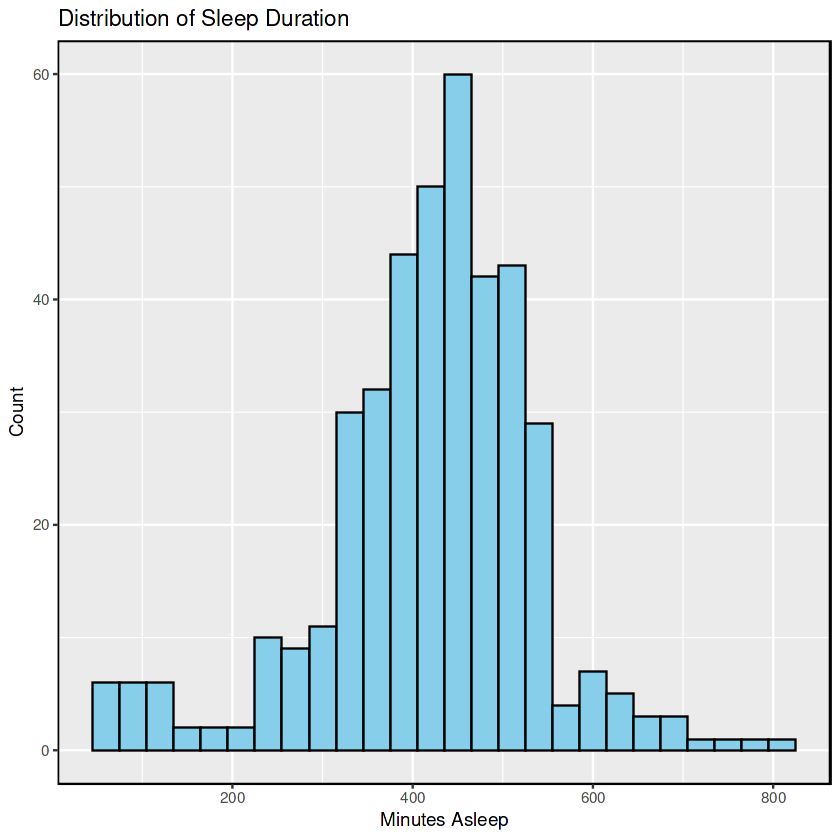

In [50]:
# Histogram showing the distribution of sleep duration of our users
ggplot(merged_data_clean, aes(x = TotalMinutesAsleep)) +
  geom_histogram(binwidth = 30, fill = "skyblue", color = "black", alpha = 1) +
  labs(title = "Distribution of Sleep Duration", x = "Minutes Asleep", y = "Count") +
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.75))


### **Total Steps vs. Hours Asleep (Colored by Sedentary Minutes)**
* Scatter plot with a color gradient representing sedentary minutes.
* Slight negative correlation between total steps and hours asleep.


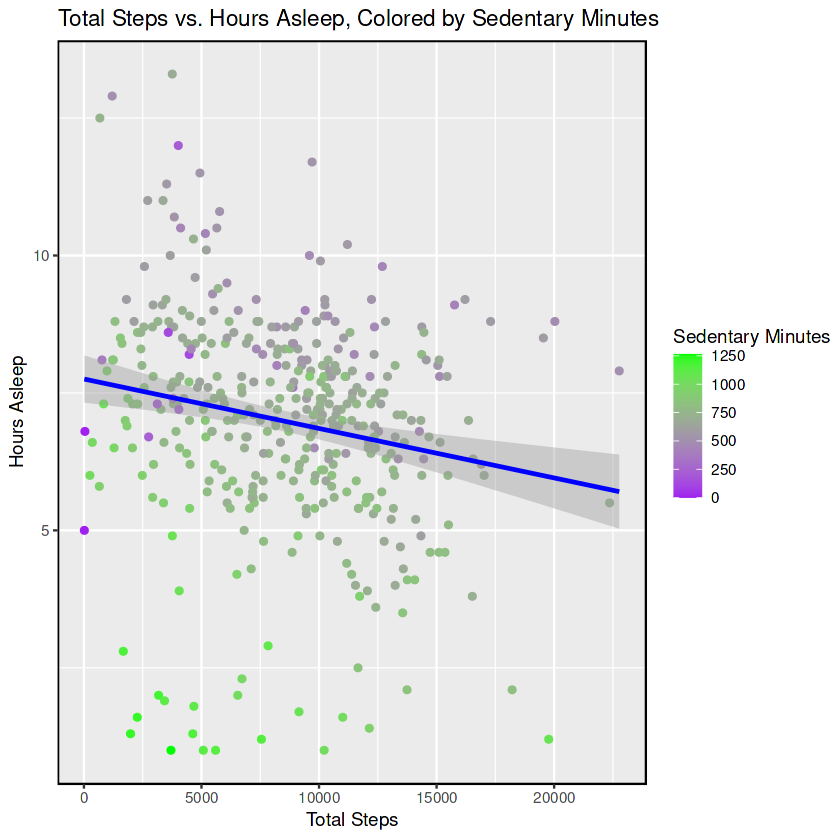

In [51]:
# Color-gradient scatter plot of Total Steps vs Hours Asleep with a colored gradient based on Sedentary Minutes
ggplot(merged_data_clean, aes(x = TotalSteps, y = TotalHoursAsleep, color = SedentaryMinutes)) +
  geom_point(alpha = 1) +
  geom_smooth(method = "lm",formula = y ~ x, aes(group = 1), color = "blue") +
  scale_color_gradient(low = "purple", high = "green") +
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.75)) +
  labs(title = "Total Steps vs. Hours Asleep, Colored by Sedentary Minutes",
       x = "Total Steps",
       y = "Hours Asleep",
       color = "Sedentary Minutes")


## **Weekly Trends in Activity**
### **Weekly Activity Patterns**
* Bar chart and boxplot comparing total steps across days of the week.
* Both charts essentially show the same information, but are different ways of digesting that information
* Identifies trends in user activity patterns.
* Boxplot makes it easier to see a distribution of steps and potential outliers.
* Bar chart makes it easier to see how daily activity compares throughout the week.


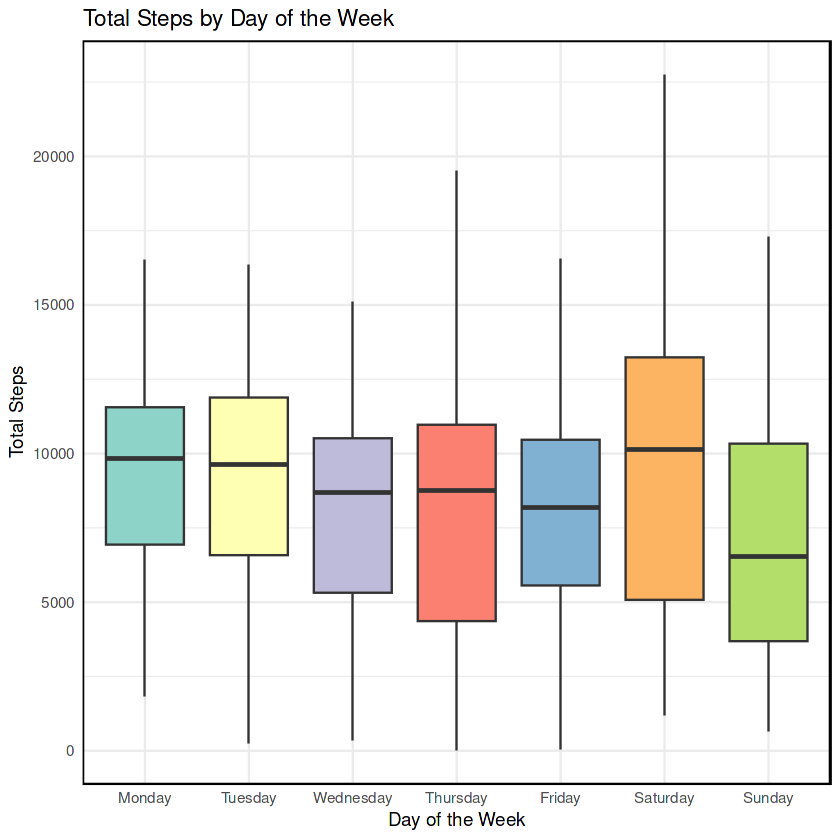

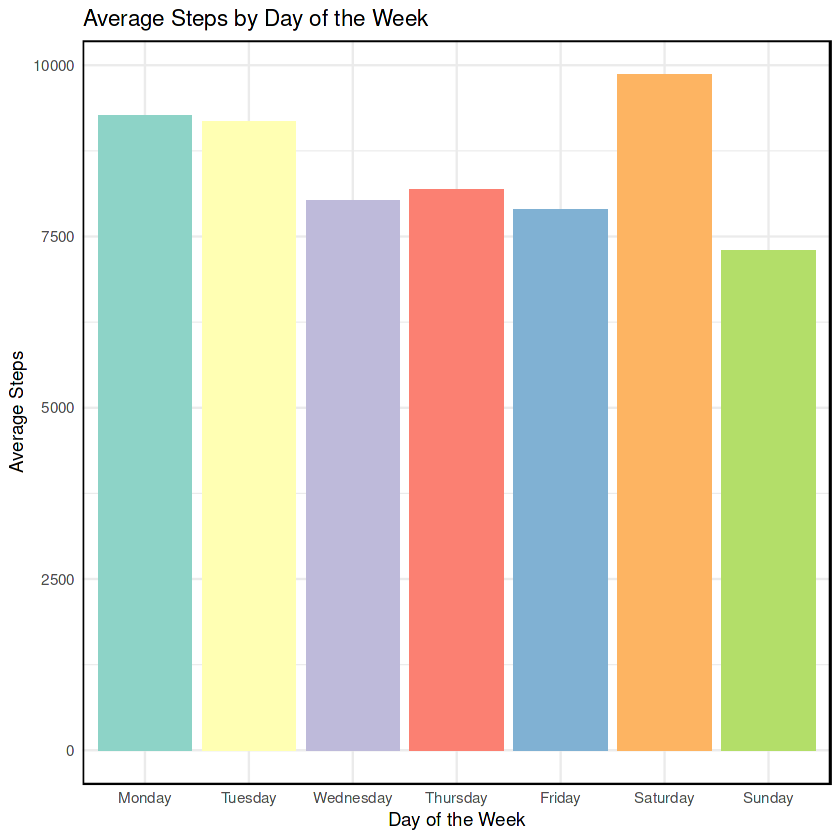

In [52]:
### Boxplot ###

# Extract day of the week
merged_data_clean <- merged_data_clean %>%
  mutate(DayOfWeek = factor(weekdays(ActivityDate), 
                            levels = c("Monday", "Tuesday", "Wednesday", 
                                       "Thursday", "Friday", "Saturday", "Sunday")))

# Boxplot of Total Steps by Day of the Week
ggplot(merged_data_clean, aes(x = DayOfWeek, y = TotalSteps, fill = DayOfWeek)) +
  geom_boxplot(alpha = 1, outlier.color = "red") +
  labs(title = "Total Steps by Day of the Week",
       x = "Day of the Week",
       y = "Total Steps") +
  theme_minimal() +
  theme(legend.position = "none", panel.border = element_rect(color = "black", fill = NA, linewidth = 0.75)) +
  scale_fill_brewer(palette = "Set3")

### Bar Chart ###

# Summarize average steps per day of the week
avg_steps <- merged_data_clean %>%
  group_by(DayOfWeek) %>%
  summarise(AverageSteps = mean(TotalSteps, na.rm = TRUE))

# Bar Chart of Total Steps by Day of the Week
ggplot(avg_steps, aes(x = DayOfWeek, y = AverageSteps, fill = DayOfWeek)) +
  geom_col() +
  labs(title = "Average Steps by Day of the Week",
       x = "Day of the Week",
       y = "Average Steps") +
  theme_minimal() +
  theme(legend.position = "none", panel.border = element_rect(color = "black", fill = NA, linewidth = 0.75)) +
  scale_fill_brewer(palette = "Set3")

# **Solutions and Marketing Suggestions**
We found several interesting insights from our analysis and visuals. Based on the findings from the visuals above, we can suggest that Bellabeat follow certain recommendations to improve their marketing strategy, user health, and overall satisfaction:

**Target Active Users**
   - Since our findings suggest a strong link between activity and calories burned, Bellabeat should market their device as an essential tool for fitness-conscious individuals who want to track and optimize their activity and sleep.
   - Highlight calorie-burning insights and personalized activity tracking in promotional campaigns.

**Target Marketing Around High-Activity Days**
   - Target marketing messages around days when users tend to be most active.
   - Offer personalized insights based on user patterns, such as suggesting optimal workout days.
   - Our findings showed that Saturday was the most active day in both average steps and lower sedentary minutes.
   - Focus on pumping out advertisements and posting videos on more active days (Saturday) to leverage the high engagement. This can include limited-time promotions, and social media marketing campaigns.

**Encourage Movement for Sedentary Users**
   - Introduce features like movement reminders or daily step challenges to motivate users to stay active.
   - Promote gamification elements, such as achievement badges and leaderboard rankings, to increase engagement.
   - Data shows that sedentary time peaks on Mondays and Fridays. Bellabeat can introduce motivational nudges or workout reminders on these days to encourage movement.

**Improve Sleep Tracking as a Standalone Selling Point**
   - Although no strong correlation was found between sleep and activity levels, Bellabeat can market sleep-tracking as a standalone feature.
   - Develop personalized sleep coaching tips based on individual sleep duration trends.
   - Our findings discovered that people who sleep less tend to take more steps.
   - Build on sending users with more steps push notifications to be mindful of resting and promoting good sleep.

# **Conclusion**
Our analysis of Bellabeat’s smart device data highlights several **key trends in user behavior**:

- Active users burn more calories—reinforcing the value of activity tracking.
- Sedentary time is high—presenting an opportunity for movement reminders & gamification.
- Weekly activity trends show Saturdays as peak engagement days—ideal for marketing efforts.
- Sleep and activity levels do not strongly correlate—suggesting sleep-tracking should be marketed separately.

**Final Marketing Takeaway**
- Bellabeat can boost engagement and sales by:
- Targeting fitness-conscious users who benefit most from tracking.
- Encouraging movement among sedentary users with reminders & challenges.
- Timing marketing campaigns to align with peak activity days (Saturday).
- Positioning sleep tracking as a standalone feature rather than linking it to activity.

By leveraging these insights, Bellabeat can refine its marketing strategy, increase user engagement and brand recognition, and expand its customer base with data-driven decision-making.